In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import svm
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import seaborn as sns

In [2]:
forest_fire=pd.read_csv('forestfires.csv')

In [3]:
forest_fire

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [32]:
labelencoder=preprocessing.LabelEncoder()
forest_fire['size_category']=labelencoder.fit_transform(forest_fire['size_category'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


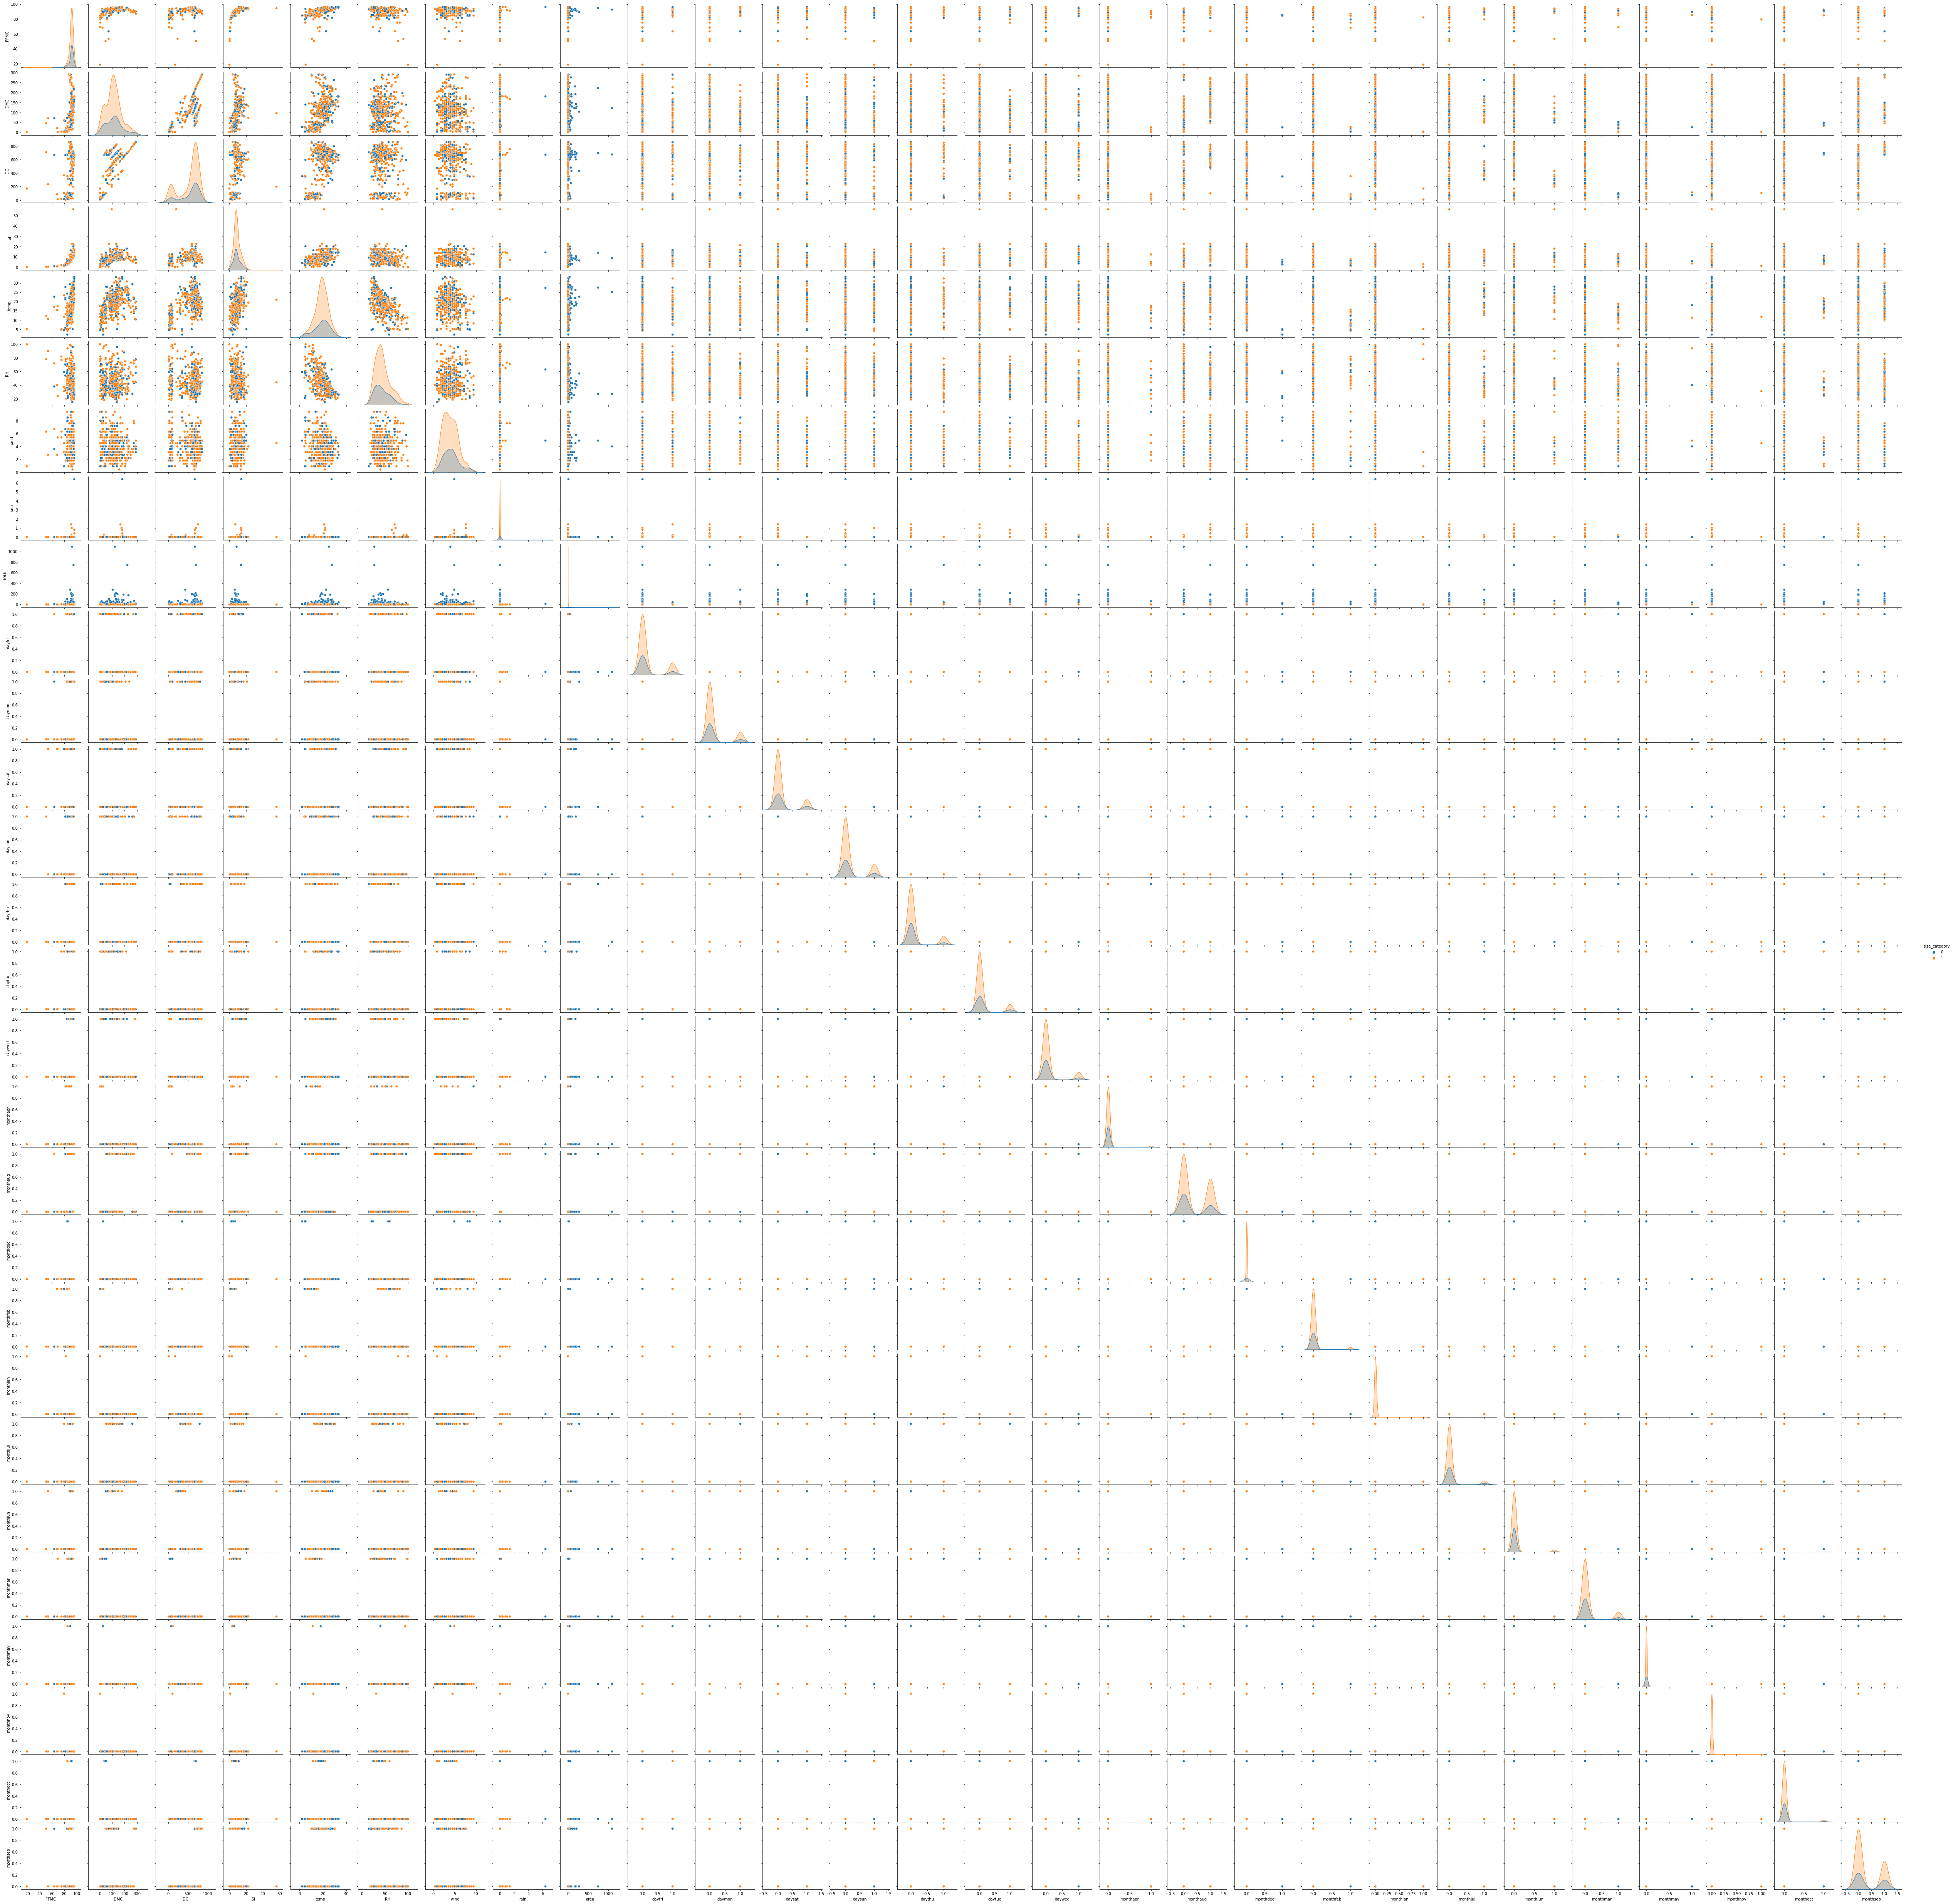

In [10]:
#we use pairplot for finding how data is distributed
sns.pairplot(forest_fire,hue='size_category')

In [ ]:
# from the above graph we conclude that the data is non linear.
#logistic method we have to use random forest.KNN,decision tree,SVM and XGBoost methods


In [12]:
forest_fire.isnull().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

In [14]:
forest_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [33]:
print('month',forest_fire.month.unique())
print('day',forest_fire.month.unique())
print('size_category',forest_fire.size_category.unique())

month ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
day ['mar' 'oct' 'aug' 'sep' 'apr' 'jun' 'jul' 'feb' 'jan' 'dec' 'may' 'nov']
size_category [1 0]


In [34]:
# no need  of month and day because they are already present in the dumiies form
# drop month and day
forest_fire=forest_fire.drop(['month','day'],axis=1)

In [21]:
forest_fire

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00,1,...,0,0,0,0,1,0,0,0,0,1
1,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00,0,...,0,0,0,0,0,0,0,1,0,1
3,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00,1,...,0,0,0,0,1,0,0,0,0,1
4,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00,0,...,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44,0,...,0,0,0,0,0,0,0,0,0,0
513,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29,0,...,0,0,0,0,0,0,0,0,0,0
514,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16,0,...,0,0,0,0,0,0,0,0,0,0
515,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00,0,...,0,0,0,0,0,0,0,0,0,1


<AxesSubplot:xlabel='count', ylabel='size_category'>

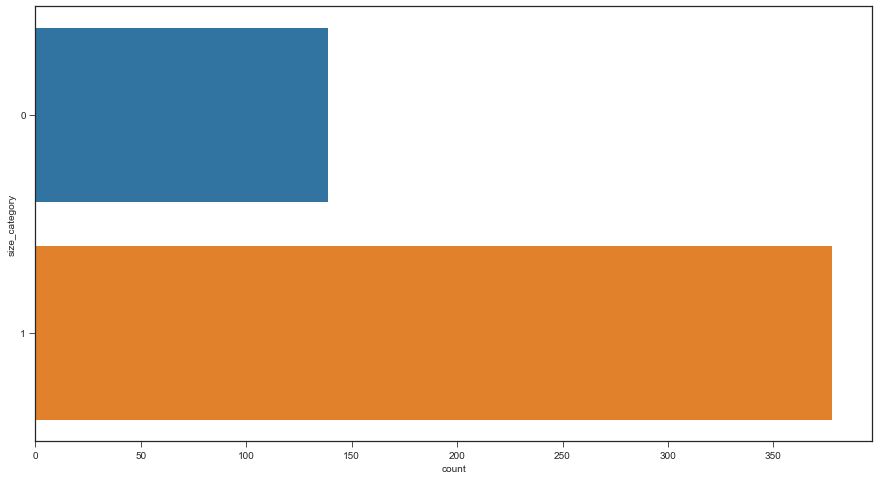

In [24]:
fig=plt.figure(figsize=(15,8))
plt.style.use('seaborn-ticks')
sns.countplot(y='size_category',data=forest_fire)
# here we saw that smaller area is 3 times less effected than than the alrge area

In [26]:
forest_fire1=forest_fire.values
x=forest_fire1[:,0:28]
y=forest_fire1[:,28]

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=5)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((346, 28), (171, 28), (346,), (171,))

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


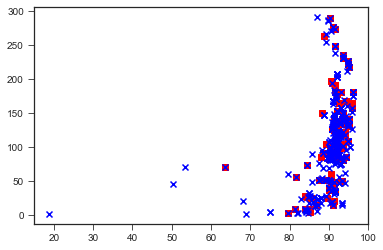

In [35]:
markers=('s','x')
colors=('red','blue')
cmap=ListedColormap((colors[:len(np.unique(y_test))]))
for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x=x[y==cl,0],y=x[y==cl,1],
               c=cmap(idx),marker=markers[idx],
               label=cl)

In [36]:
clf=SVC()
param_grid=[{'kernel':['rbf','gaussian','polynomial'],'gamma':[50,25,10,5,0.5,0.1,0.01],'C':[15,10,5,3,2,0.1]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 226, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 277, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn\svm\_libsvm.pyx", line 176, in sklearn.svm._libsvm.fit
ValueError: 'gaussian' is not in list

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFail

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 10, 5, 3, 2, 0.1],
                          'gamma': [50, 25, 10, 5, 0.5, 0.1, 0.01],
                          'kernel': ['rbf', 'gaussian', 'polynomial']}])

In [37]:
gsv.best_params_,gsv.best_score_

({'C': 15, 'gamma': 0.5, 'kernel': 'rbf'}, 0.7312605042016808)

In [38]:
# so "rbf" is the best kernel for find best accuracy 

clf=SVC(gamma=0.5,C=15)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accu=accuracy_score(y_pred,y_test)*100
print("Accuracy:%.2f%%" %accu)

Accuracy:75.44%


In [39]:
confusion_matrix(y_test,y_pred)

array([[  0,  42],
       [  0, 129]], dtype=int64)

In [42]:
#Q2
# salaryn data set and train and test data 

In [3]:
s_train=pd.read_csv('SalaryData_Train(1).csv')
s_test=pd.read_csv('SalaryData_Test(1).csv')

In [44]:
s_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [45]:
s_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,Private,Bachelors,13,Never-married,Prof-specialty,Own-child,White,Male,0,0,40,United-States,<=50K
15056,39,Private,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
15057,38,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
15058,44,Private,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [47]:
s_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [48]:
s_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [49]:
s_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


In [50]:
s_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB


In [55]:
#Here we have to change age and hoursperweek are float type means there must be some cleaning required for both train and test data

s_train.age=s_train.age.astype(float)
s_train['hoursperweek']=s_train['hoursperweek'].astype(float)
s_test.age=s_test.age.astype(float)
s_test['hoursperweek']=s_test['hoursperweek'].astype(float)

In [56]:
s_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            30161 non-null  float64
 1   workclass      30161 non-null  object 
 2   education      30161 non-null  object 
 3   educationno    30161 non-null  int64  
 4   maritalstatus  30161 non-null  object 
 5   occupation     30161 non-null  object 
 6   relationship   30161 non-null  object 
 7   race           30161 non-null  object 
 8   sex            30161 non-null  object 
 9   capitalgain    30161 non-null  int64  
 10  capitalloss    30161 non-null  int64  
 11  hoursperweek   30161 non-null  float64
 12  native         30161 non-null  object 
 13  Salary         30161 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 3.2+ MB


In [57]:
s_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            15060 non-null  float64
 1   workclass      15060 non-null  object 
 2   education      15060 non-null  object 
 3   educationno    15060 non-null  int64  
 4   maritalstatus  15060 non-null  object 
 5   occupation     15060 non-null  object 
 6   relationship   15060 non-null  object 
 7   race           15060 non-null  object 
 8   sex            15060 non-null  object 
 9   capitalgain    15060 non-null  int64  
 10  capitalloss    15060 non-null  int64  
 11  hoursperweek   15060 non-null  float64
 12  native         15060 non-null  object 
 13  Salary         15060 non-null  object 
dtypes: float64(2), int64(3), object(9)
memory usage: 1.6+ MB


In [59]:
#columns like workclass,native and occupation have NAs values as per domain knowledge
s_train=s_train.dropna()
s_test=s_test.dropna()

In [60]:
# Feature engineering method

print('workclass',s_train.workclass.unique())
print('\n education',s_train.education.unique())
print('\n occupation',s_train.occupation.unique())
print('\n relationship',s_train.relationship.unique())
print('\n race',s_train.race.unique())
print('\n sex',s_train.sex.unique())
print('\n native',s_train.native.unique())
print('\n Salary',s_train.Salary.unique())

workclass [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' Self-emp-inc' ' Without-pay']

 education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' 7th-8th' ' Doctorate' ' Assoc-voc' ' Prof-school'
 ' 5th-6th' ' 10th' ' Preschool' ' 12th' ' 1st-4th']

 occupation [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Transport-moving' ' Farming-fishing'
 ' Machine-op-inspct' ' Tech-support' ' Craft-repair' ' Protective-serv'
 ' Armed-Forces' ' Priv-house-serv']

 relationship [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

 race [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

 sex [' Male' ' Female']

 native [' United-States' ' Cuba' ' Jamaica' ' India' ' Mexico' ' Puerto-Rico'
 ' Honduras' ' England' ' Canada' ' Germany' ' Iran' ' Philippines'
 ' Poland' ' Columbia' ' Cambodia' ' Thailand' ' Ecuador' ' Laos'
 ' 

In [61]:
# Feature engineering method

print('workclass',s_test.workclass.unique())
print('\n education',s_test.education.unique())
print('\n occupation',s_test.occupation.unique())
print('\n relationship',s_test.relationship.unique())
print('\n race',s_test.race.unique())
print('\n sex',s_test.sex.unique())
print('\n native',s_test.native.unique())
print('\n Salary',s_test.Salary.unique())

workclass [' Private' ' Local-gov' ' Self-emp-not-inc' ' Federal-gov' ' State-gov'
 ' Self-emp-inc' ' Without-pay']

 education [' 11th' ' HS-grad' ' Assoc-acdm' ' Some-college' ' 10th' ' Prof-school'
 ' 7th-8th' ' Bachelors' ' Masters' ' 5th-6th' ' Assoc-voc' ' 9th'
 ' Doctorate' ' 12th' ' 1st-4th' ' Preschool']

 occupation [' Machine-op-inspct' ' Farming-fishing' ' Protective-serv'
 ' Other-service' ' Prof-specialty' ' Craft-repair' ' Adm-clerical'
 ' Exec-managerial' ' Tech-support' ' Sales' ' Priv-house-serv'
 ' Transport-moving' ' Handlers-cleaners' ' Armed-Forces']

 relationship [' Own-child' ' Husband' ' Not-in-family' ' Unmarried' ' Wife'
 ' Other-relative']

 race [' Black' ' White' ' Other' ' Amer-Indian-Eskimo' ' Asian-Pac-Islander']

 sex [' Male' ' Female']

 native [' United-States' ' Peru' ' Guatemala' ' Mexico' ' Dominican-Republic'
 ' Ireland' ' Germany' ' Philippines' ' Thailand' ' Haiti' ' El-Salvador'
 ' Puerto-Rico' ' Vietnam' ' South' ' Columbia' ' Japan' ' Indi

<AxesSubplot:xlabel='count', ylabel='Salary'>

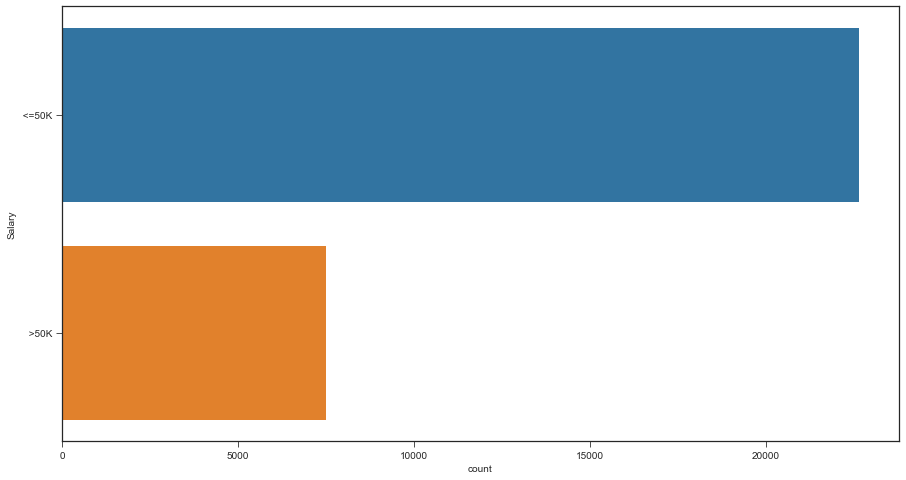

In [62]:
fig=plt.figure(figsize=(15,8))
plt.style.use('seaborn-ticks')
sns.countplot(y='Salary',data=s_train)

#Only 12000 approx people has salary greater than 50k else are less than 50k

<AxesSubplot:xlabel='count', ylabel='Salary'>

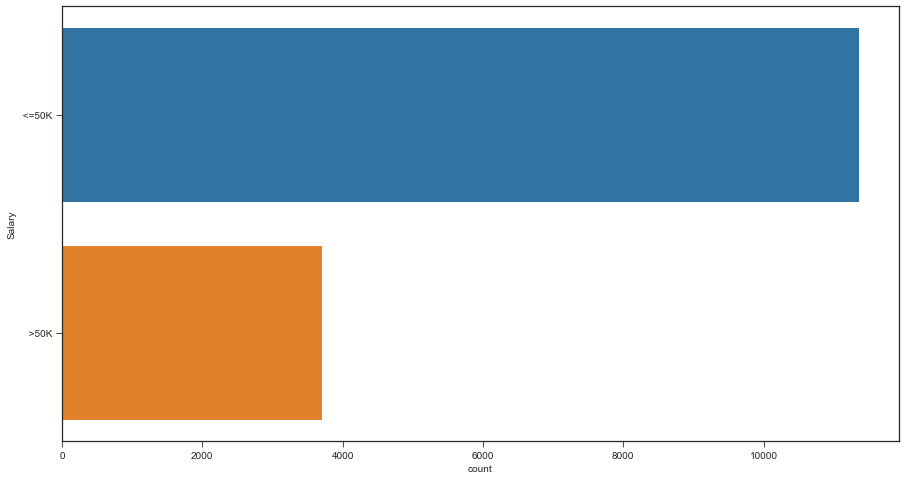

In [63]:
fig=plt.figure(figsize=(15,8))
plt.style.use('seaborn-ticks')
sns.countplot(y='Salary',data=s_test)

#Only 12000 approx people has salary greater than 50k else are less than 50k

In [64]:
s_train[['education','educationno']].groupby(['education'],as_index=False).mean().sort_values(by='educationno',ascending=False)

,education,educationno
10,Doctorate,16
14,Prof-school,15
12,Masters,14
9,Bachelors,13
7,Assoc-acdm,12
8,Assoc-voc,11
15,Some-college,10
11,HS-grad,9
2,12th,8
1,11th,7


<AxesSubplot:xlabel='count', ylabel='education'>

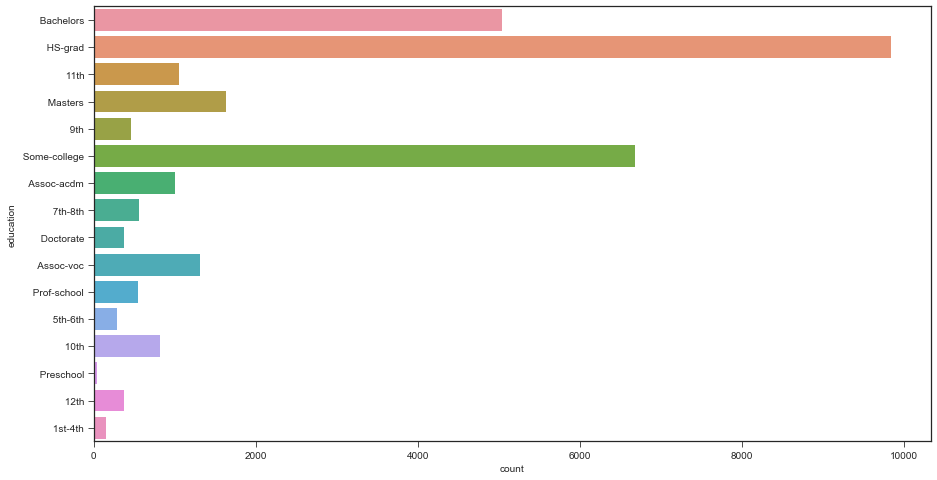

In [66]:
fig=plt.figure(figsize=(15,8))
plt.style.use('seaborn-ticks')
sns.countplot(y="education",data=s_train)

In [65]:
s_test[['education','educationno']].groupby(['education'],as_index=False).mean().sort_values(by='educationno',ascending=False)

,education,educationno
10,Doctorate,16
14,Prof-school,15
12,Masters,14
9,Bachelors,13
7,Assoc-acdm,12
8,Assoc-voc,11
15,Some-college,10
11,HS-grad,9
2,12th,8
1,11th,7


<AxesSubplot:xlabel='count', ylabel='education'>

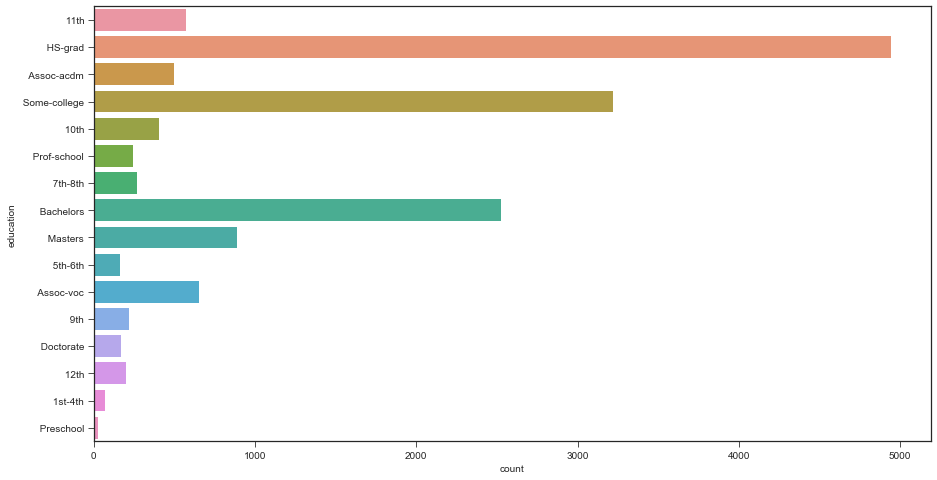

In [67]:
fig=plt.figure(figsize=(15,8))
plt.style.use('seaborn-ticks')
sns.countplot(y="education",data=s_test)

<AxesSubplot:xlabel='count', ylabel='native'>

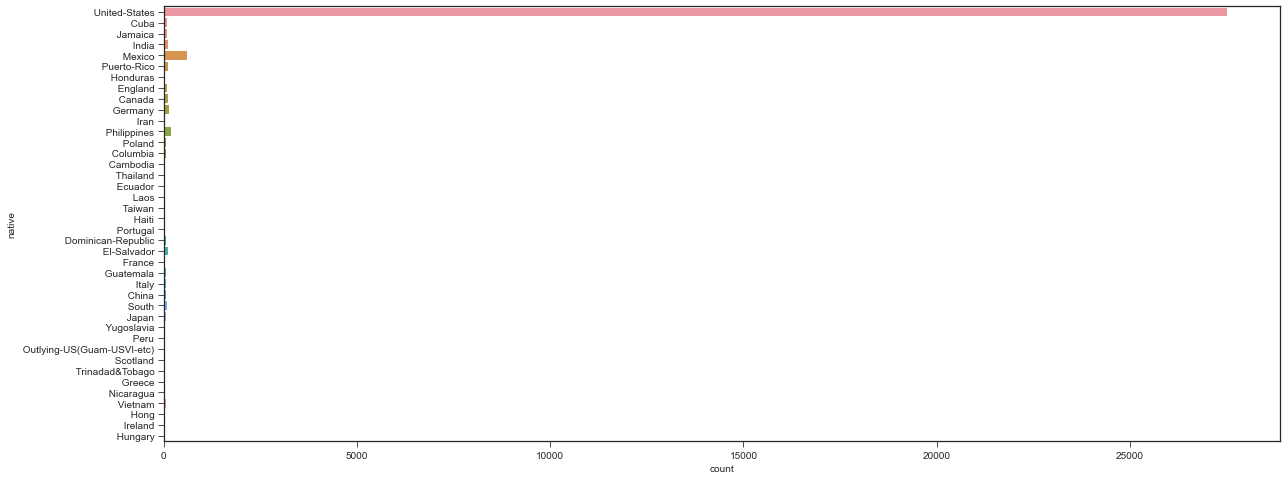

In [68]:
fig=plt.figure(figsize=(20,8))
plt.style.use('seaborn-ticks')
sns.countplot(y='native',data=s_train)
# 40k population belongs to USA

<AxesSubplot:xlabel='count', ylabel='native'>

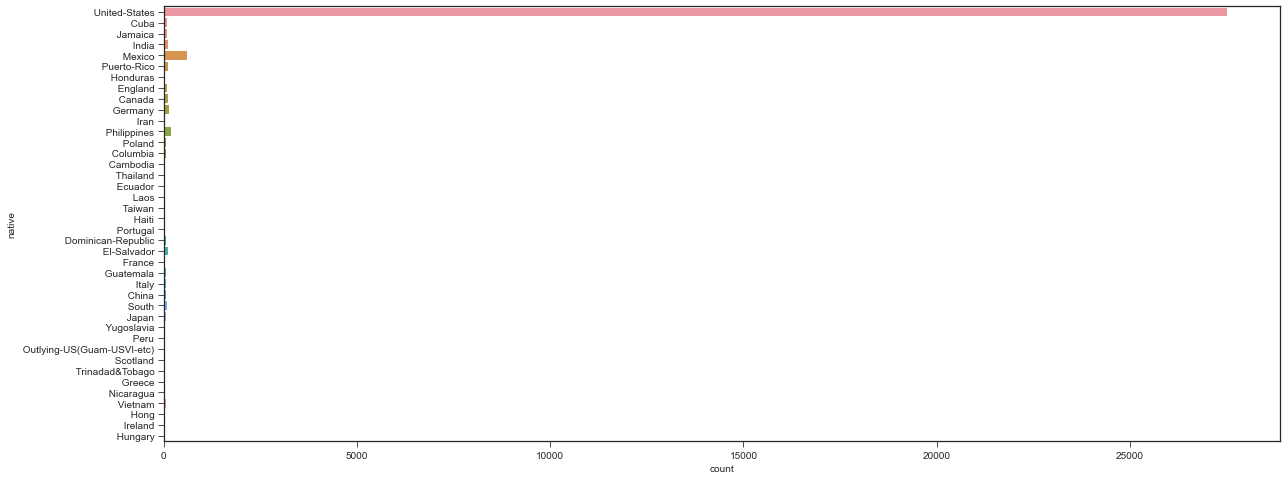

In [69]:
fig=plt.figure(figsize=(20,8))
plt.style.use('seaborn-ticks')
sns.countplot(y='native',data=s_train)
# 40k population belongs to USA

In [70]:
#groupby salary
s_train[['Salary','age']].groupby(['Salary'],as_index=False).mean().sort_values(by='age',ascending=False)

# People of age greater than 44 having salary greater than 50k and rest are below or equal to 50k

,Salary,age
1,>50K,43.959110
0,<=50K,36.608264


In [71]:
#groupby salary
s_test[['Salary','age']].groupby(['Salary'],as_index=False).mean().sort_values(by='age',ascending=False)

# People of age greater than 44 having salary greater than 50k and rest are below or equal to 50k

,Salary,age
1,>50K,44.101351
0,<=50K,37.031338


In [12]:
s_train=s_train.apply(LabelEncoder().fit_transform)
s_train.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,24,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0


In [13]:
s_test=s_test.apply(LabelEncoder().fit_transform)
s_test.head()

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,8,2,1,6,4,6,3,2,1,0,0,39,37,0
1,21,2,11,8,2,4,0,4,1,0,0,49,37,0
2,11,1,7,11,2,10,0,4,1,0,0,39,37,1
3,27,2,15,9,2,6,0,2,1,87,0,39,37,1
4,17,2,0,5,4,7,1,4,1,0,0,29,37,0


In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler=StandardScaler


In [14]:
s_train.shape

(30161, 14)

In [15]:
x_train=s_train.iloc[:,0:13]
y_train=s_train.iloc[:,13]
x_train.shape,y_train.shape

((30161, 13), (30161,))

In [16]:
s_test.shape

(15060, 14)

In [17]:
x_test=s_test.iloc[:,0:13]
y_test=s_test.iloc[:,13]
x_test.shape,y_test.shape

((15060, 13), (15060,))

In [ ]:
clf=SVC()
param_grid=[{'kernel':['rbf'],'gamma':[5],'C':[0.1]}]
gsv=GridSearchCV(clf,param_grid,cv=10)
gsv.fit(x_train,y_train)